In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.svm import SVC
from sklearn.cluster import KMeans 
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import r2_score
import pickle
import warnings 
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head() #prints the top 5 rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail() #prints the last 5 rows of the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape #returns the rows and columns of dataset

(150, 5)

In [6]:
df.describe() 

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
df.ndim

2

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [12]:
df.max()

sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object

In [13]:
df.min()

sepal_length            4.3
sepal_width             2.0
petal_length            1.0
petal_width             0.1
species         Iris-setosa
dtype: object

In [14]:
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [15]:
print(df.duplicated().sum())
df[df.duplicated()]

3


,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


Text(0.5, 1.0, 'Petal length VS Petal width')

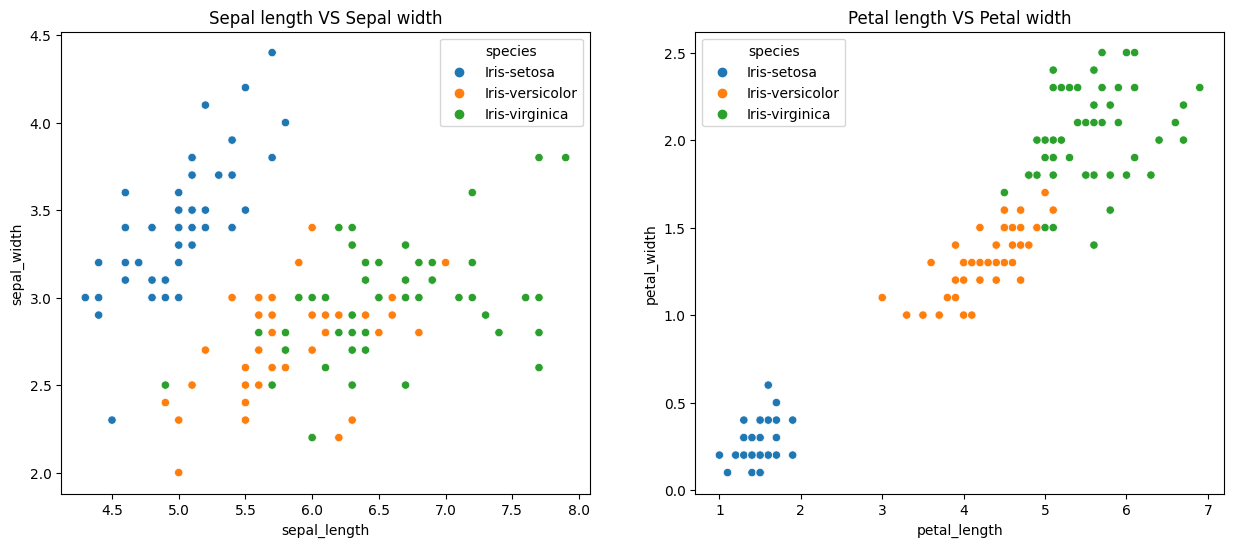

In [16]:
# visualisation between sepal length vs sepal width ; petal length vs petal width
fig,ax=plt.subplots(1,2)
fig.set_size_inches(15,6)
sns.scatterplot(ax=ax[0],x="sepal_length",y="sepal_width",hue='species',data=df)
sns.scatterplot(ax=ax[1],x="petal_length",y="petal_width",hue='species',data=df)
ax[0].set_title("Sepal length VS Sepal width")
ax[1].set_title("Petal length VS Petal width")

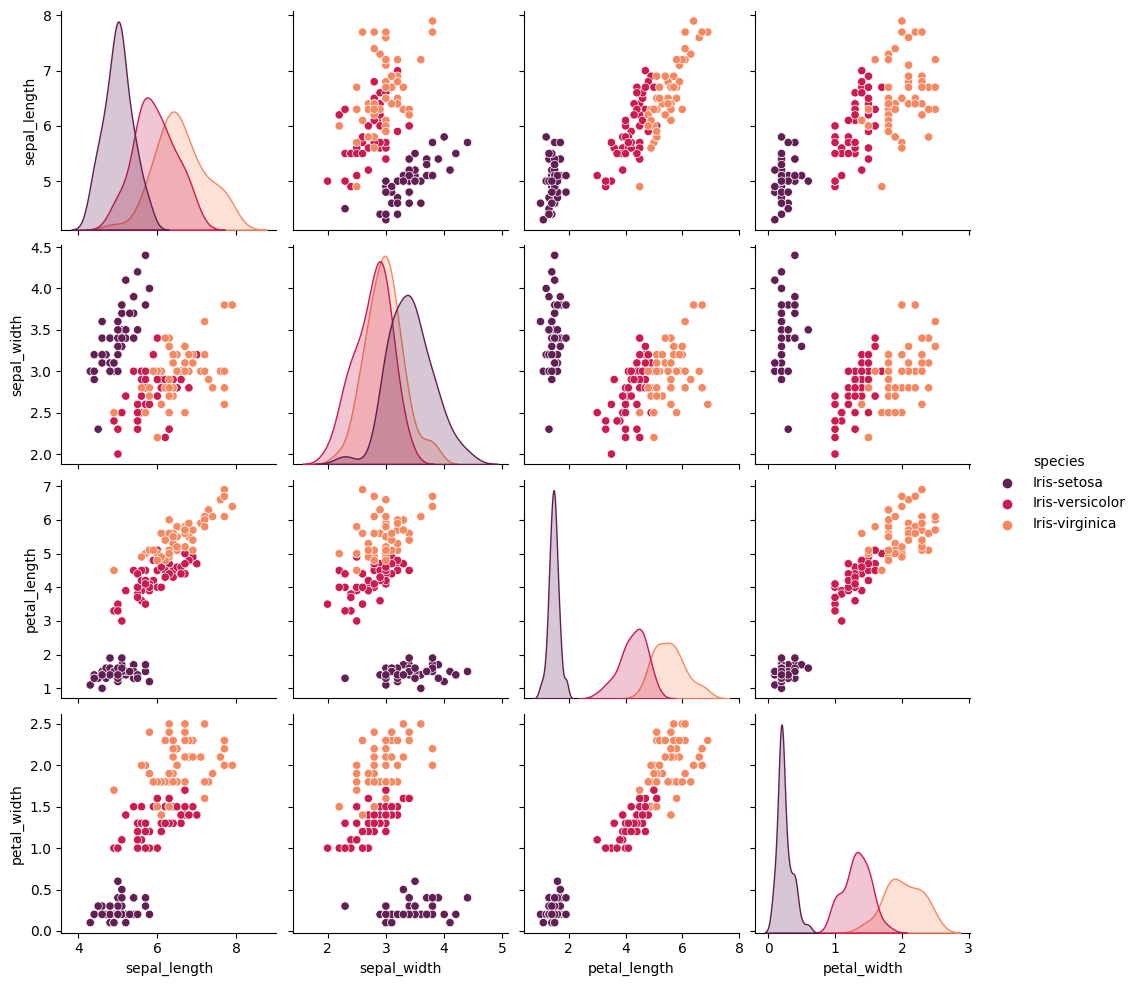

In [17]:
sns.pairplot(df,hue="species",palette="rocket")
plt.grid(True)

<Axes: >

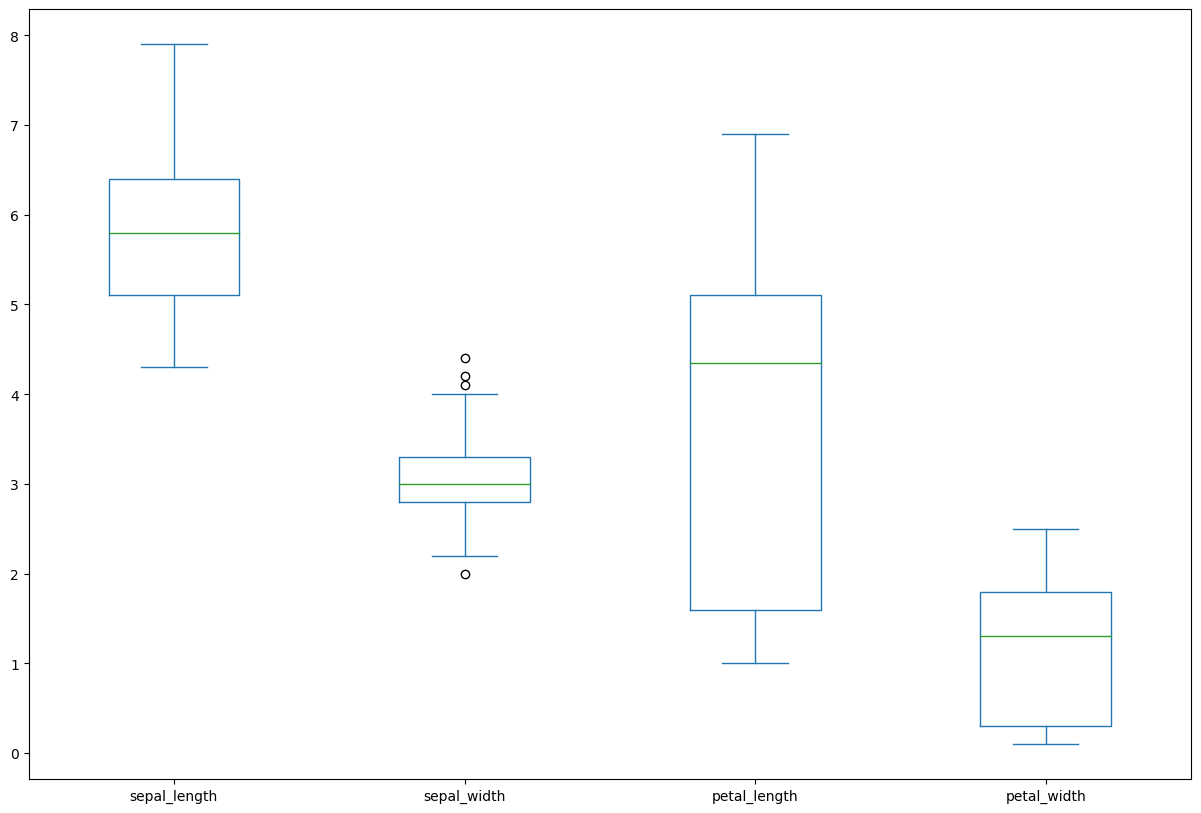

In [18]:
df.plot(kind='box',sharex=False,sharey=False,figsize=(15,10))

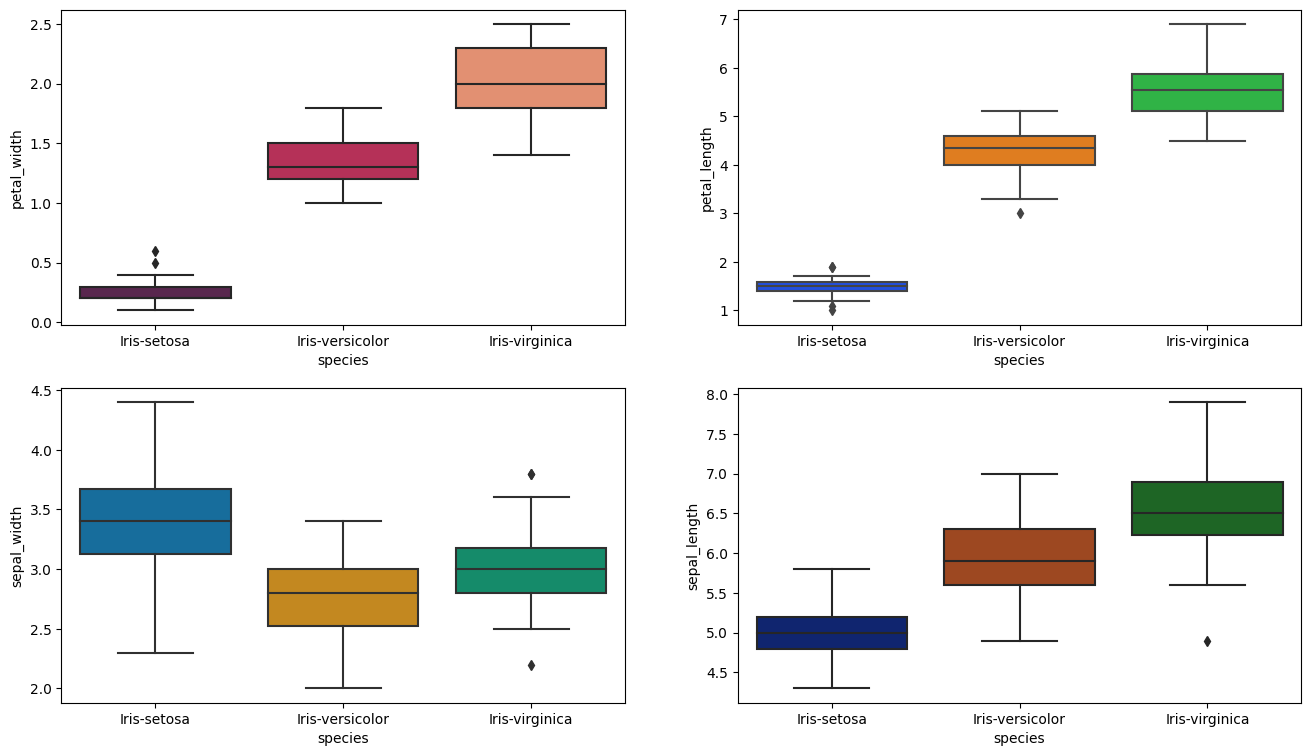

In [19]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot(y="petal_width", x= "species", data=df,  orient='v' , ax=axes[0, 0],palette="rocket")
sns.boxplot(y="petal_length", x= "species", data=df,  orient='v' , ax=axes[0, 1],palette="bright")
sns.boxplot(y="sepal_width", x= "species", data=df,  orient='v' , ax=axes[1, 0],palette="colorblind")
sns.boxplot( y="sepal_length", x= "species", data=df,  orient='v' , ax=axes[1, 1],palette="dark")
plt.show()

<Axes: xlabel='petal_length', ylabel='Count'>

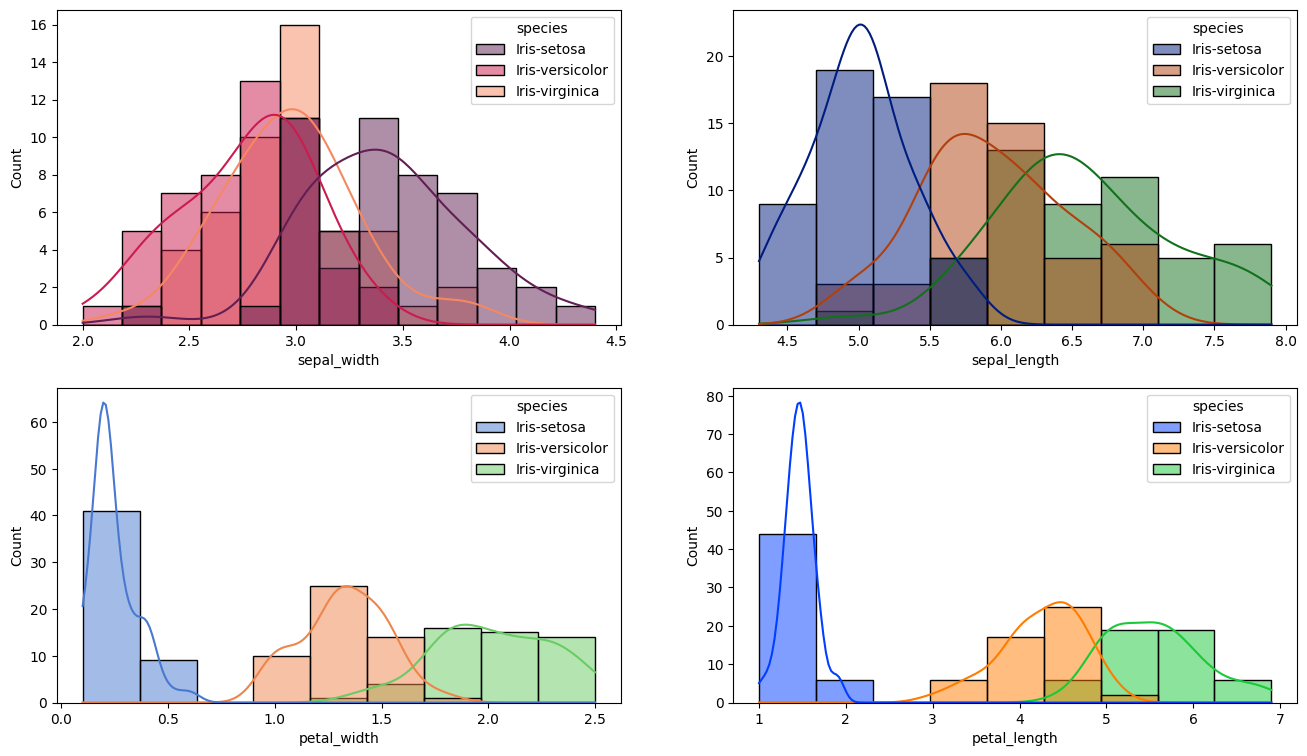

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.histplot(ax = axes[0,0],data=df,x ='sepal_width',hue='species',kde=True,palette="rocket")
sns.histplot(ax = axes[0,1],data=df,x ='sepal_length',hue='species',kde=True,palette="dark")
sns.histplot(ax = axes[1,0],data=df,x ='petal_width',hue='species',kde=True,palette="muted")
sns.histplot(ax = axes[1,1],data=df,x ='petal_length',hue='species',kde=True,palette="bright")

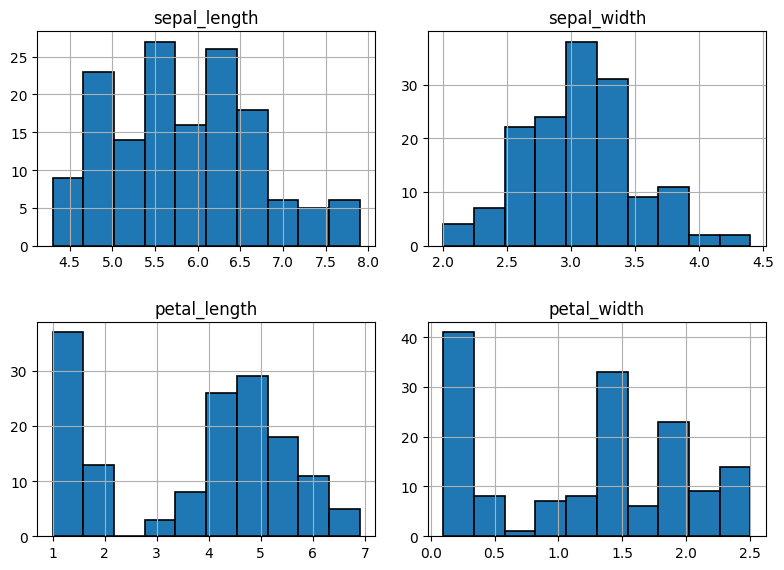

In [22]:
df.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
plt.tight_layout()
fig.set_size_inches(8,6)

<Axes: xlabel='species', ylabel='petal_width'>

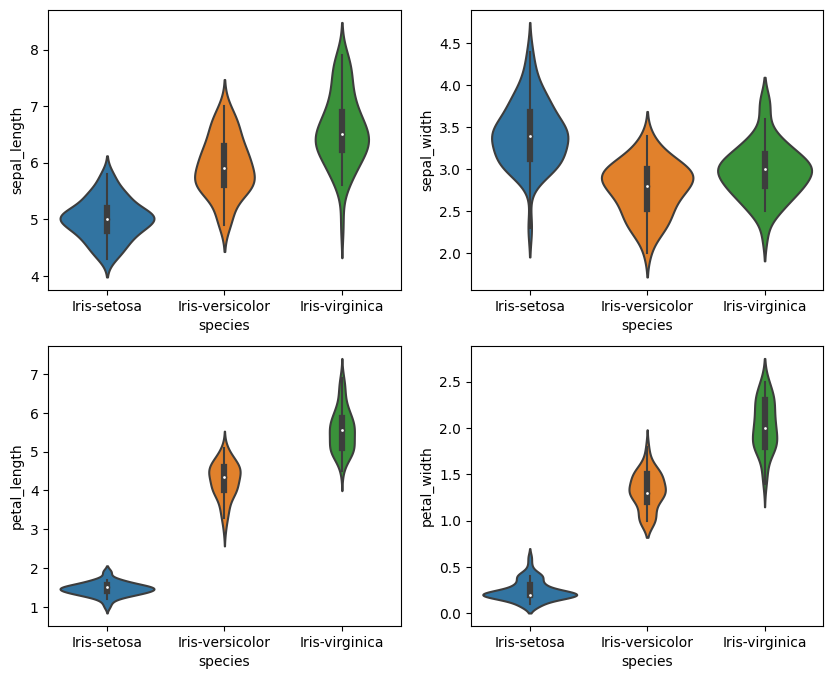

In [21]:
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.violinplot(x='species', y = 'sepal_length', data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species', y = 'sepal_width', data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species', y = 'petal_length', data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species', y = 'petal_width', data=df)

In [23]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [24]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


<Axes: >

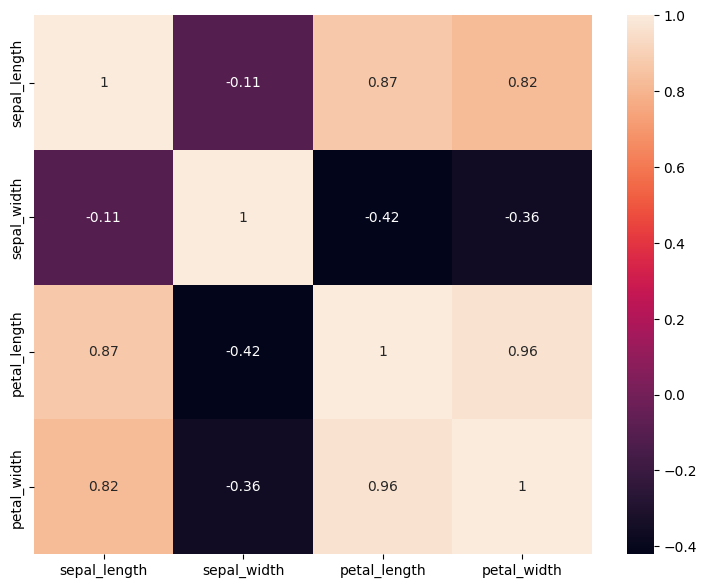

In [25]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),annot=True,cmap='rocket')

In [26]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['species']= label_encoder.fit_transform(df['species'])
  
df['species'].unique()

array([0, 1, 2])

In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
# Seperating the data into dependent and independent variables
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [29]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle=True,random_state = 5)
# Here: traiining dataset-70% and testing dataset-30%

In [30]:
#feature Scaling      
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)   
X_test= st_x.transform(X_test)  

In [31]:
#Fitting Linear Regression to the training set  
classifier6=LinearRegression()
classifier6.fit(X_train, y_train)

LinearRegression()

In [32]:
y_pred=classifier6.predict(X_test)

In [33]:
y_pred

array([ 1.04887375,  1.49672683,  2.15258677,  0.02074834,  2.20194767,
        0.92858404, -0.03865056,  1.64518556, -0.01324222,  1.45092132,
        1.41852877,  1.43074886,  1.89405467,  1.73164259,  0.12761003,
        0.20381242,  1.60315316,  1.74543806,  0.08944121, -0.09366057,
        1.09190344,  1.94580182, -0.0853639 ,  1.39031447,  1.19290697,
        2.07666184,  1.10533147,  1.19790308,  1.30833581,  2.0170081 ,
       -0.05180112,  1.19103148,  0.8398383 , -0.10156018,  1.1613991 ,
       -0.05601707,  0.26963251,  1.9808942 ])

In [34]:
# Accuracy score

accuracy6=round(r2_score(y_pred,y_test)*100,2)
print('accuracy is',accuracy6,"%")

accuracy is 89.41 %


In [36]:
#Fitting Logistic Regression to the training set  
classifier=LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [37]:
#Predicting the test set result  
y_pred=classifier.predict(X_test)

In [38]:
y_pred

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [39]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.93      0.90        14
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [40]:
print(confusion_matrix(y_test, y_pred))

[[12  0  0]
 [ 0 13  1]
 [ 0  2 10]]


In [41]:
# Accuracy score
accuracy1=round(accuracy_score(y_pred,y_test)*100,2)
print('accuracy is',accuracy1,"%")

accuracy is 92.11 %


In [42]:
#Fitting K-NN classifier to the Training data
classifier1=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )
classifier1.fit(X_train,y_train)

KNeighborsClassifier()

In [43]:
#Predicting the test set result  
y_pred1= classifier1.predict(X_test)  

In [44]:
y_pred1

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [45]:
print('accuracy is',accuracy_score(y_pred1,y_test)*100,"%")

accuracy is 94.73684210526315 %


Text(0.5, 1.0, 'Accuracy Scores for Values of k of k-Nearest-Neighbors')

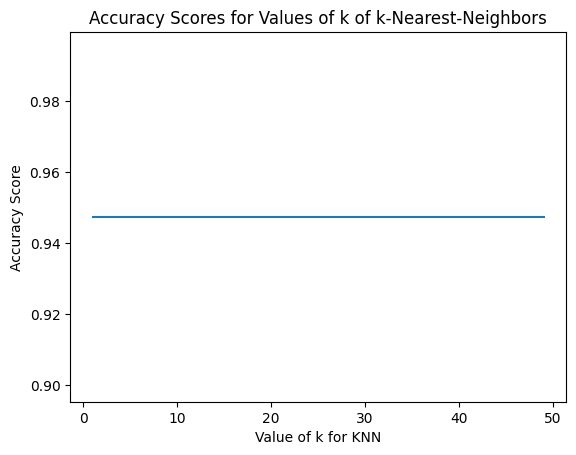

In [46]:
k_range = list(range(1,50))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(pd.Series(accuracy_score(y_pred1,y_test)))
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')

In [47]:
classifier2=KNeighborsClassifier(n_neighbors=6, metric='minkowski', p=2 )
classifier2.fit(X_train,y_train)
prediction= classifier2.predict(X_test)  
# Accuracy score
accuracy2=round(accuracy_score(prediction,y_test)*100,2)
print('accuracy is',accuracy2,"%")

accuracy is 97.37 %


In [48]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38



In [49]:
print(confusion_matrix(y_test, y_pred1))

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


In [50]:
classifier3 = SVC(random_state=5)  
classifier3.fit(X_train, y_train)  

SVC(random_state=5)

In [51]:
#Predicting the test set result  
y_pred3 = classifier3.predict(X_test) 

In [52]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      0.93      0.93        14
           2       0.92      0.92      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

[[12  0  0]
 [ 0 13  1]
 [ 0  1 11]]


In [53]:
# Accuracy score
accuracy3=round(accuracy_score(y_pred3,y_test)*100,2)
print('accuracy is',accuracy3,"%")

accuracy is 94.74 %


Text(0, 0.5, 'wcss_list')

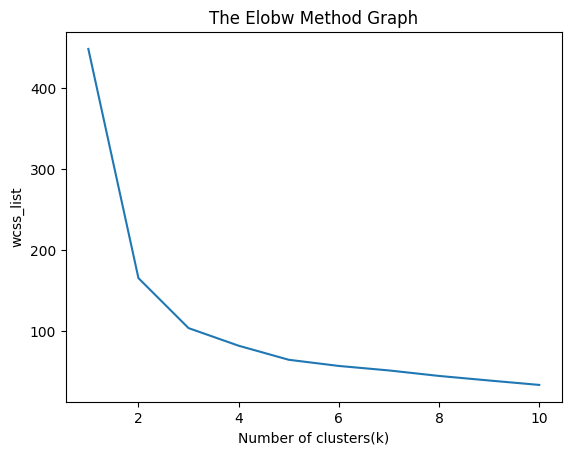

In [54]:
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, 
                    n_init=10, random_state= 42)  
    kmeans.fit(X_train)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list') 

In [55]:
kmeans1 = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans1.fit_predict(X_train)

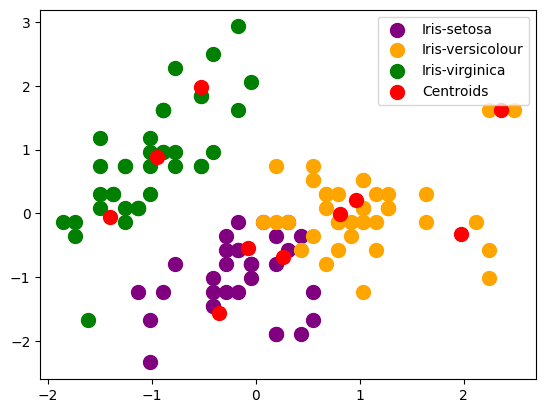

In [56]:
#Visualising the clusters
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

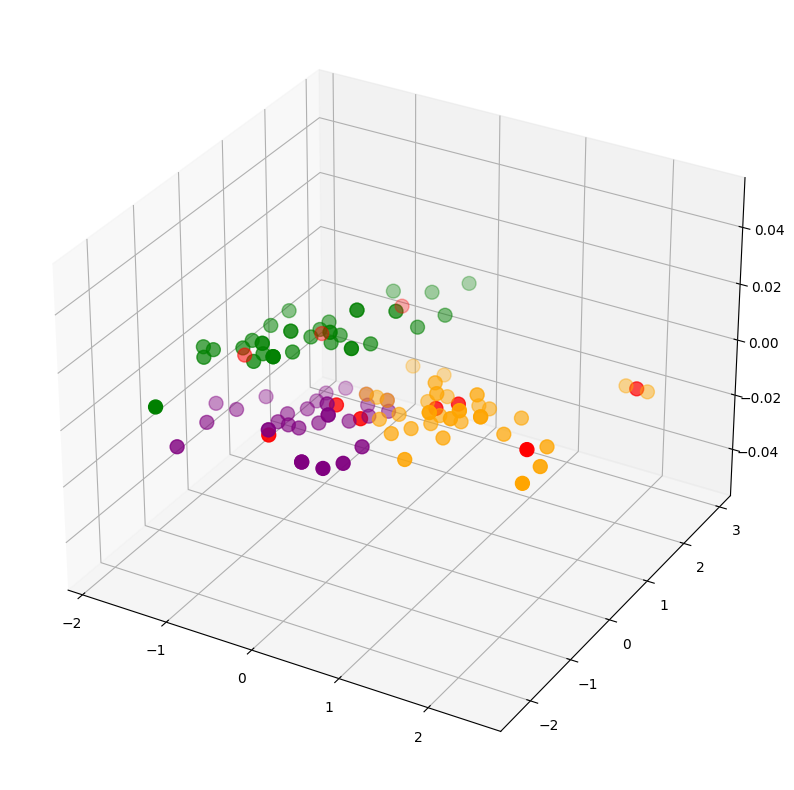

In [57]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X_train[y_kmeans == 0, 0], X_train[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(X_train[y_kmeans == 1, 0], X_train[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X_train[y_kmeans == 2, 0], X_train[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

In [58]:
classifier4 = DecisionTreeClassifier()
classifier4.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_pred4 = classifier4.predict(X_test)

In [60]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.86      0.92        14
           2       0.86      1.00      0.92        12

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

[[12  0  0]
 [ 0 12  2]
 [ 0  0 12]]


In [61]:
# Accuracy score
accuracy4=round(accuracy_score(y_pred4,y_test)*100,2)
print('accuracy is',accuracy4,"%")

accuracy is 94.74 %


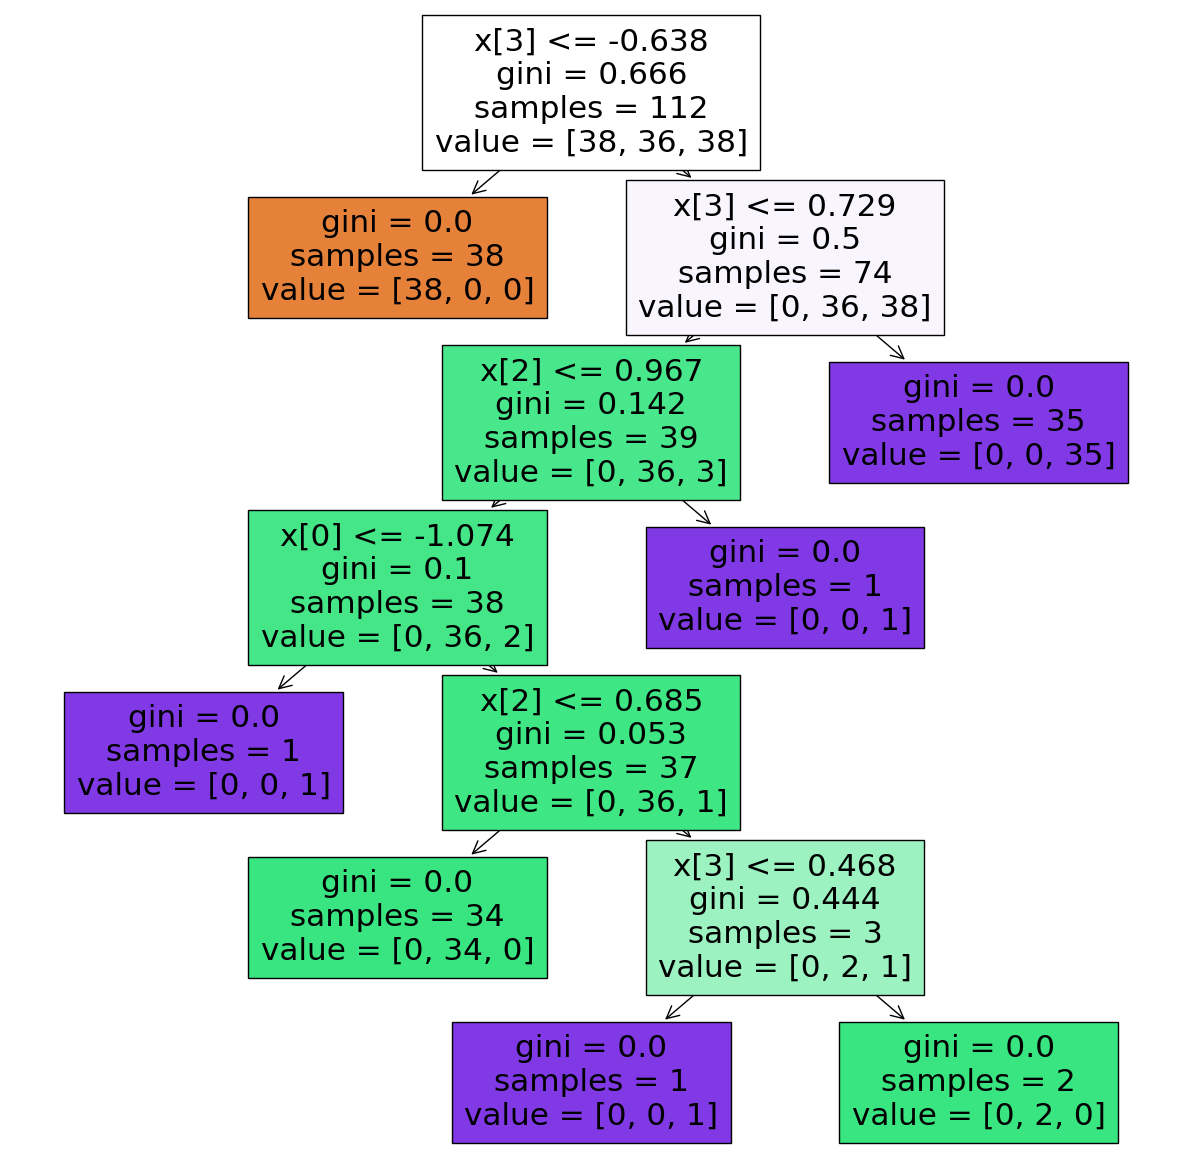

In [62]:
plt.figure (figsize=(15,15))
plot_tree(classifier4,filled= True)
print()

In [ ]:
classifier5 = RandomForestClassifier(n_estimators= 10, criterion="entropy")  

In [63]:
y_pred5 = classifier.predict(X_test)  

In [64]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.93      0.90        14
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

[[12  0  0]
 [ 0 13  1]
 [ 0  2 10]]


In [65]:
# Accuracy score
accuracy5=round(accuracy_score(y_pred5,y_test)*100,2)
print('accuracy is',accuracy5,"%")

accuracy is 92.11 %


In [66]:
results = pd.DataFrame({
    'Model': ['Linear Regression',
              'Logistic Regression', 
              'K-Nearest Neighbours',
              'Support Vector Machine (SVM)',
              'Decision Tree Classifier',
              'Random Forest'],
    "Accuracy_score":[accuracy6,
                      accuracy1,
                      accuracy2,
                      accuracy3,
                      accuracy4,
                      accuracy5,
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head()

,Model,Accuracy_score
0,K-Nearest Neighbours,97.37
1,Support Vector Machine (SVM),94.74
2,Decision Tree Classifier,94.74
3,Logistic Regression,92.11
4,Random Forest,92.11


In [67]:
results['Accuracy_score']

0    89.41
1    92.11
2    97.37
3    94.74
4    94.74
5    92.11
Name: Accuracy_score, dtype: float64

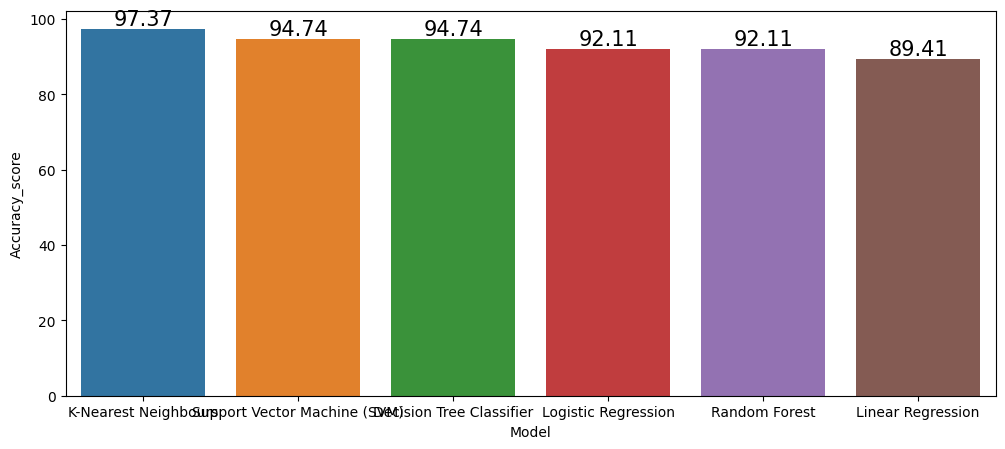

In [68]:
plt.subplots(figsize=(12,5))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')